# Support Vector Machine (SVM)

서포트 벡터 머신은 매우 강력한 분류 기법입니다. 또한 핵심 개념은 매우 간단하므로 쉽게 익힐 수 있습니다. 다음의 예시를 생각해보자.

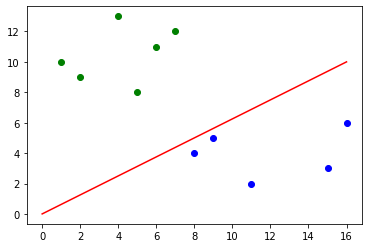

In [55]:
import numpy as np
import matplotlib.pyplot as plt

green=[[1,4,6,2,5,7],[10,13,11,9,8,12]]
blue=[[11,9,8,15,16],[2,5,4,3,6]]
plt.plot(green[0],green[1],'go')
plt.plot(blue[0],blue[1],'bo')
plt.plot([0,16],[0,10],'r-')

두 개의 집단(class)를 나누는 간단한 방법을 생각해보자. 두 개의 집단 사이를 가로지르는 선을 하나 그어서 그 선 위에 있는 점들은 녹색, 아래에 있는 점은 파란색 집단으로 생각하면 손쉽게 분류할 수 있다. 그러면 어떻게 두 집단을 가르는 최적의 결정 경계(decision boundary)를 찾을 수 있을까? 임의의 선이 그어져 있다고 가정해보자. 그러면 각각의 집단에서 직선에 가장 가까운 점과 직선 사이에 거리를 마진(margin)이라고 부르기로 하자. 그러면 간단한 해법은 마진을 최대로 만드는 직선을 찾는 것이다. 위의 간단한 방법을 통해 $wx+b$ 결정 경계를 찾는 방법을 서포트 벡터 머신이라고 부른다. 서포트 벡터는 직선에 가장 가까운 집을 지나가는 결정경계와 평행한 선을 이야기하며 이 벡터가 결정 경계를  지지(support)해주므로 다음과 같은 이름으로 부른다. 즉 서포트 벡터와 결정경계 사이가 마진이 된다.

### Maximizing the margin

In [56]:
from sklearn.svm import SVC # support vector classification
X=np.concatenate((np.transpose(green),np.transpose(blue)))
y=[1,1,1,1,1,1,0,0,0,0,0]

In [57]:
svc=SVC(kernel='linear')
svc.fit(X,y)
svc.decision_function(X)

array([ 2.71399982,  2.71448661,  1.57167583,  2.14259443,  0.99994591,
        1.5718381 , -2.42848643, -0.99989182, -1.00005409, -3.28518886,
       -2.71345894])

In [58]:
svc.score(X,y)

1.0

In [60]:
svc.predict(X)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [61]:
svc.coef_[0,1],svc.intercept_[0]

(0.28578382769230753, 0.14178310564102867)

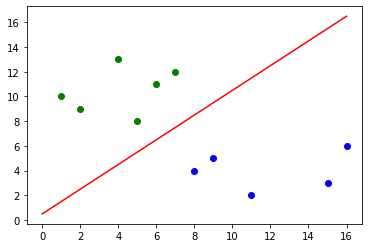

In [62]:
plt.plot(green[0],green[1],'go')
plt.plot(blue[0],blue[1],'bo')
x=np.linspace(0,16,20)
a=-svc.coef_[0,0]/svc.coef_[0,1]
b=svc.intercept_[0]/svc.coef_[0,1]
plt.plot(x,a*x+b,'r-')

## Nonlinear Support Vector Machine

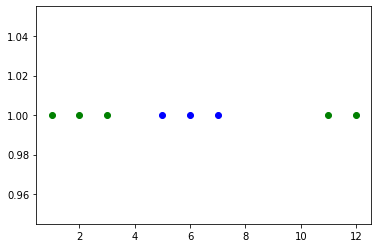

In [63]:
green=[1,2,3,11,12]
blue=[5,6,7]
plt.plot(blue,[1 for i in blue],'bo')
plt.plot(green,[1 for i in green],'go')

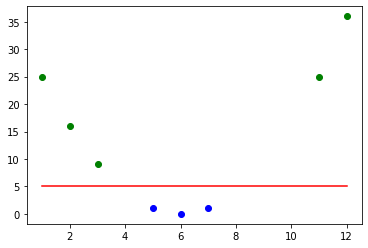

In [64]:
green=[1,2,3,11,12]
blue=[5,6,7]
plt.plot(blue,[(i-6)**2 for i in blue],'bo')
plt.plot(green,[(i-6)**2 for i in green],'go') 
plt.plot(green,[5 for i in green],'r-')

### kernel trick

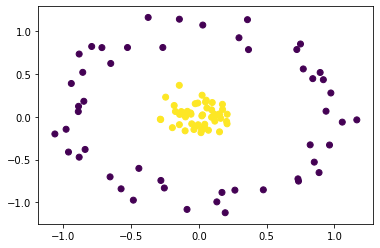

In [85]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)

# classifier
clf=SVC(kernel='linear')
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)

0.7

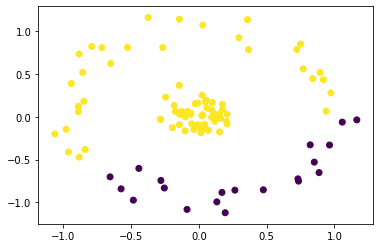

In [88]:
plt.scatter(X[:,0],X[:,1],c=clf.predict(X))
clf.score(X,y)

1.0

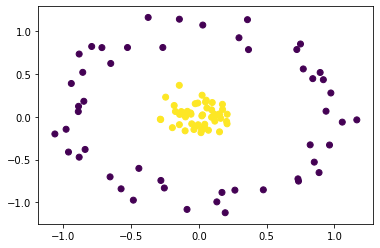

In [89]:
clf2=SVC(kernel='rbf',gamma='auto')
clf2.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=clf2.predict(X))
clf2.score(X,y)

### How to find parameters
* see references such as:
1. https://scikit-learn.org/stable/modules/svm.html
2. https://en.wikipedia.org/wiki/Support_vector_machine